# TOPICS SENTIMENT ANALYSIS 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# ytbr = "felipeneto"
ytbr = "enaldinho"
path = f"../data/{ytbr}/"
img_path = f"{path}imgs/"

In [32]:
df = pd.read_csv(f"{path}topics_sentiment.csv").drop(['Unnamed: 0'], axis=1)
df.head()

,id,video_id,video_title,comment_id,comment_text,comment_author_channel_id,comment_like_count,comment_reply_count,is_reply,parent_comment_id,comment_text_cleaned,topics,name,Representation,Representative_Docs,topic_proba,sentiment,sentiment_score,topic_sentiment
0,0,iUBD_IS32VI,ACORDEI O MEU AMIGO COM UMA CABRA! #shorts,UgwMVGpjEjQut8aICUd4AaABAg,o enaldo tocando violao e a cabra aaaaaaaaaah...,UCQ7F9jKoGU1jv294C4WB2bA,4,0,False,0,enaldo tocando violao cabra ahah abriu boca,-1,-1_voce_nao_dinho_nada,"['voce', 'nao', 'dinho', 'nada', 'ta', 'vai', ...",['hoje hein vc vai ter fazer vou fazer pra vc ...,0.000000,neutral,0.409725,-1_voce_nao_dinho_nada (neutral)
1,4,iUBD_IS32VI,ACORDEI O MEU AMIGO COM UMA CABRA! #shorts,UgxRsN_oLy0eIRPA1114AaABAg.A8B6kXMDqPNA8DLufljeqt,among us mas os inocentes morrem se nao conseg...,UC1OCUt9EDzDvxT_OPGxhBDw,1,0,True,UgxRsN_oLy0eIRPA1114AaABAg,among us inocentes morem nao conseguirem dinhe...,119,119_dinheiro_rico_pensa_pesoas,"['dinheiro', 'rico', 'pensa', 'pesoas', 'gasto...",['ese dinheiro enaldinho gasta podia ajudar pe...,0.840809,negative,0.876035,119_dinheiro_rico_pensa_pesoas (negative)
2,5,iUBD_IS32VI,ACORDEI O MEU AMIGO COM UMA CABRA! #shorts,Ugwq6S4ONWY6PRW2taR4AaABAg,O grito da cabra me quebro,UCfEPXQmfVKUgDi-yQXLOQNw,4,0,False,0,grito cabra quebro,-1,-1_voce_nao_dinho_nada,"['voce', 'nao', 'dinho', 'nada', 'ta', 'vai', ...",['hoje hein vc vai ter fazer vou fazer pra vc ...,0.000000,negative,0.930355,-1_voce_nao_dinho_nada (negative)
3,16,iUBD_IS32VI,ACORDEI O MEU AMIGO COM UMA CABRA! #shorts,UgyGPqtYpgxXlBQTSNl4AaABAg,Ficou muito bom,UC3JLPnz0UFk3GJzpOTzwYkA,1,0,False,0,ficou bom,-1,-1_voce_nao_dinho_nada,"['voce', 'nao', 'dinho', 'nada', 'ta', 'vai', ...",['hoje hein vc vai ter fazer vou fazer pra vc ...,0.000000,positive,0.905104,-1_voce_nao_dinho_nada (positive)
4,17,iUBD_IS32VI,ACORDEI O MEU AMIGO COM UMA CABRA! #shorts,UgzGrzXzg6wNPc42Yph4AaABAg,TE AMO ENALDINHO VOCE E O MELHOR YOUTUBE R,UCfZIFYsHos9cxnfxPQuXzvg,1,0,False,0,amo enaldinho voce melhor youtube,4,4_youtube_youtuber_youtubers_melhor,"['youtube', 'youtuber', 'youtubers', 'melhor',...","['enaldinho vc melhor youtube', 'enaldinho mel...",1.000000,positive,0.878908,4_youtube_youtuber_youtubers_melhor (positive)


In [33]:
sentiment_counts = df['sentiment'].value_counts()

avg_scores = df.groupby('sentiment')['sentiment_score'].mean()

print("Sentiment Counts:")
print(sentiment_counts)

print("\nAverage Sentiment Scores:")
print(avg_scores)

Sentiment Counts:
sentiment
neutral     9203
negative    5171
positive    2801
Name: count, dtype: int64

Average Sentiment Scores:
sentiment
negative    0.662620
neutral     0.559486
positive    0.670979
Name: sentiment_score, dtype: float64


## Word Cloud

In [34]:
def plot_word_cloud(text, title, save=False, _path=""):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    if save:
        plt.savefig(f"{_path}")
    plt.show()


In [35]:
positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df  = df[df['sentiment'] == 'neutral']

positive_text = " ".join(positive_df['comment_text_cleaned'])
negative_text = " ".join(negative_df['comment_text_cleaned'])
neutral_text = " ".join(neutral_df['comment_text_cleaned'])

# plot_word_cloud(positive_text, 'Positive Comments Word Cloud', True, f"{img_path}positive_comments.png" )
# plot_word_cloud(negative_text, 'Negative Comments Word Cloud', True, f"{img_path}negative_comments.png" )
# plot_word_cloud(positive_text, 'Positive Comments Word Cloud')
# plot_word_cloud(negative_text, 'Negative Comments Word Cloud')
# plot_word_cloud(neutral_text, 'Neutral Comments Word Cloud')

## Words 

In [36]:
negative_df[negative_df["sentiment_score"] >= 0.8].sort_values(by="sentiment_score", ascending=False).head()

,id,video_id,video_title,comment_id,comment_text,comment_author_channel_id,comment_like_count,comment_reply_count,is_reply,parent_comment_id,comment_text_cleaned,topics,name,Representation,Representative_Docs,topic_proba,sentiment,sentiment_score,topic_sentiment
7249,11104,iV14fC_k4uU,TRABALHANDO EM UMA PROFISSÃO DIFERENTE POR 24 ...,UgwZZ3h-7RGIEl6bur94AaABAg,o enaldinho isso e chato,UCMzGu_GWK5p5Ake-ypWkSMA,0,0,False,0,enaldinho iso chato,157,157_chato_chata_pobre_gaiato,"['chato', 'chata', 'pobre', 'gaiato', 'maltrat...","['vc chato', 'vc chato', 'enaldinho chato']",1.000000,negative,0.968963,157_chato_chata_pobre_gaiato (negative)
10611,16155,hLcjQ4YnAZw,FUI PERSEGUIDO POR UMA BABÁ DO MAL! *Sobrevive...,UgwwUXrGVwiUAUYMUo54AaABAg,se lasco enaldo,UCHkbgP4c1BXsiy5ilfy7PeQ,0,0,False,0,lasco enaldo,-1,-1_voce_nao_dinho_nada,"['voce', 'nao', 'dinho', 'nada', 'ta', 'vai', ...",['hoje hein vc vai ter fazer vou fazer pra vc ...,0.000000,negative,0.966518,-1_voce_nao_dinho_nada (negative)
9669,14741,b7tpmOmNkVU,QUEM COLA O POST-IT MAIS ALTO? #shorts,UgyXg71kzjz-hqvAG6h4AaABAg,Ruim de mais esse video sempre o enaldinho ven...,UCQV3ihEKIkLW2bleyEJeXGg,0,0,False,0,ruim ese video sempre enaldinho vence esas coi...,-1,-1_voce_nao_dinho_nada,"['voce', 'nao', 'dinho', 'nada', 'ta', 'vai', ...",['hoje hein vc vai ter fazer vou fazer pra vc ...,0.000000,negative,0.966308,-1_voce_nao_dinho_nada (negative)
6341,9723,b3BIti04lsg,CONSTRUÍ UM PARQUE DE CAMA ELÁSTICA GIGANTE NA...,UgysJxSSEQtOuokBCjN4AaABAg,QUE FEIO EMELE VICK,UCbCSrGlN2Ye4oEfD-mL8MPg,2,0,False,0,feio emele vick,18,18_aviao_marcelao_coitado_planta,"['aviao', 'marcelao', 'coitado', 'planta', 'fe...","['ave ese aviao tudo judiado', 'aviao judiado'...",0.973392,negative,0.965672,18_aviao_marcelao_coitado_planta (negative)
941,1352,nmhCK4DBB3w,EU CONSTRUÍ UM ZOOLÓGICO SECRETO!,Ugwl_BIxJfP6HulYM3B4AaABAg,Esses cara e muito chato e bobo,UCOR5x4kHdH448LGpNuTBTrA,0,0,False,0,eses cara chato bobo,157,157_chato_chata_pobre_gaiato,"['chato', 'chata', 'pobre', 'gaiato', 'maltrat...","['vc chato', 'vc chato', 'enaldinho chato']",1.000000,negative,0.965267,157_chato_chata_pobre_gaiato (negative)


In [39]:
def plot_most_negative_topics(df: pd.DataFrame, sentiment_threshold: float = 0.8):
    negative_comments = df[(df['sentiment'] == 'positive') & (df['sentiment_score'] >= sentiment_threshold)]
    
    topic_negative_counts = negative_comments.groupby('topics').size().reset_index(name='negative_count')

    topic_negative_counts = topic_negative_counts.merge(df[['topics', 'name', 'Representation']].drop_duplicates(), on='topics')
    
    topic_negative_counts = topic_negative_counts[~topic_negative_counts['name'].str.startswith('-1')]

    topic_negative_counts = topic_negative_counts.sort_values(by='negative_count', ascending=False)
    
    topic_negative_counts["name"] = topic_negative_counts["name"].str.replace(r'^\d+_', '', regex=True).str.replace('_', ',')

    plt.figure(figsize=(10, 6))
    sns.barplot(data=topic_negative_counts.head(10), x='negative_count', y='name', palette='Reds_r')
    
    plt.title(f'Top 10 Most Negative Topics (Sentiment Score >= {sentiment_threshold*100}%)', fontsize=14)
    plt.xlabel('Number of Negative Comments', fontsize=12)
    plt.ylabel('Topic Name', fontsize=12)
    plt.show()


/tmp/ipykernel_926226/3501745230.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topic_negative_counts.head(10), x='negative_count', y='name', palette='Reds_r')


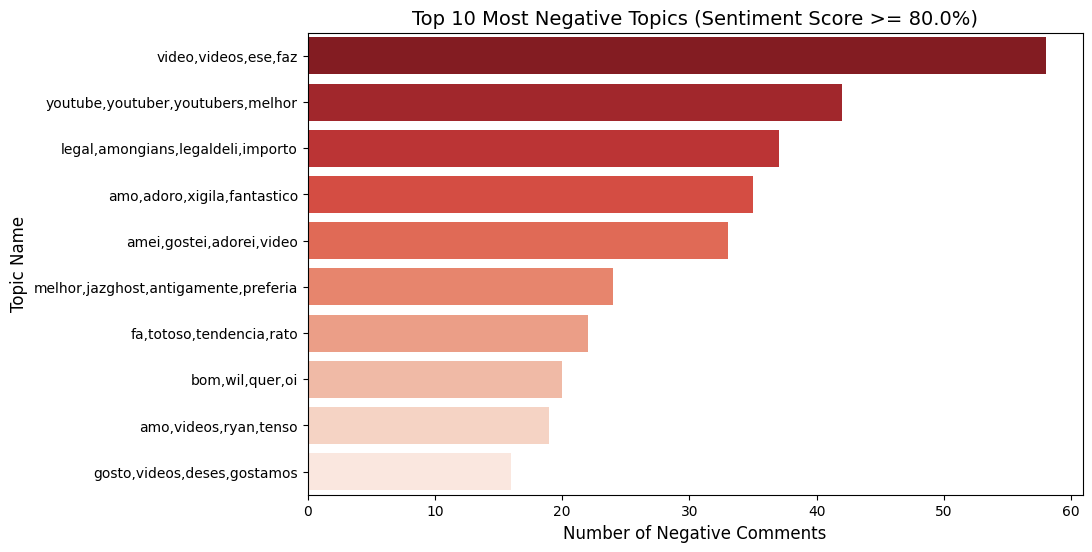

In [40]:
# 144_mentira_mentiroso_mentiras_verdades
# 130_pior_piores_materiais_imposivelmeu
plot_most_negative_topics(df, sentiment_threshold=0.8)